In [1]:
import mex_mva as mex

# MEX 2019

## Miroslav Kubu

In [2]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('data.csv', delimiter=',')
year = np.arange(1982,2019)

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [5]:
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
data

array([ 120.,   93.,  190.,   92.,  156.,   78.,   61.,  165.,   72.,
        157.,  137.,   87.,  266.,   91.,   95.,  151.,  174.,  180.,
         63.,  214.,   88.,  151.,   79.,  258.,   80.,   93.,  110.,
         86.,  305.,  149.,   87.,  255.,  138.,  103.,  115.,   80.,  247.])

# Descriptive Analysis

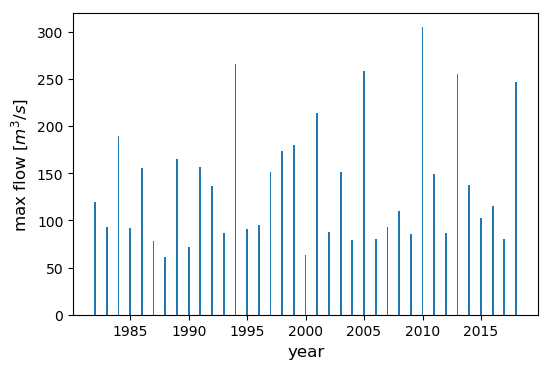

In [4]:
from matplotlib import pyplot as plt
plt.bar(year, data, width=0.15)
plt.ylabel("max flow $[m^3/s]$",fontsize=12)
plt.xlabel("year",fontsize=12)
plt.show()

In [8]:
stats.describe(data)

DescribeResult(nobs=37, minmax=(61.0, 305.0), mean=136.91891891891891, variance=4189.5765765765755, skewness=0.9920179056381929, kurtosis=0.013501017566245554)

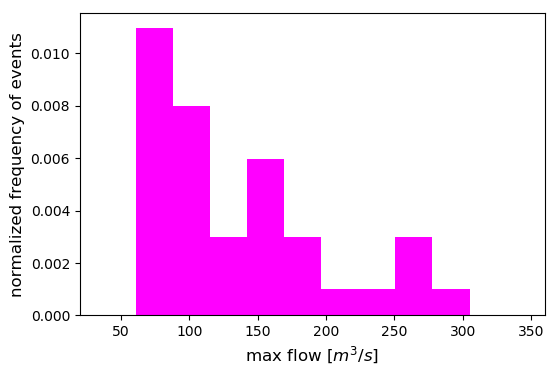

In [9]:
hist = plt.hist(data,'doane',normed=True,alpha=1,color = 'magenta')
plt.ylabel("normalized frequency of events",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([20,360])
plt.legend(fontsize=12)
plt.show()

# Distribution-free equations

In [10]:
mean = np.mean(data)
var = np.var(data)
scnd_moment = var + mean*mean
values = [230, 310]

mean, scnd_moment

(136.91891891891891, 22823.13513513513)

## Markov

In [72]:
for eps in values:
    prob = mean/eps
    if eps < mean:
        print("P(X<{0})  >".format(eps),1-prob)
    else:
        print("P(X>{0}) <".format(eps),prob)

P(X>230) < 0.595299647474
P(X>310) < 0.441673931997


## Cebysev

In [73]:
values2 = values - mean
Y = data - mean

meanY = np.mean(Y)
varY = np.var(Y)
scnd_momentY = varY + meanY*meanY

for eps in values:
    prob = scnd_momentY/((eps-mean)*(eps-mean))
    if eps < mean:
        print("P(X<{0})  >".format(eps),1-prob)
    else:
        print("P(X>{0}) <".format(eps),prob)

P(X>230) < 0.470487481132
P(X>310) < 0.1360729221


## Cebysev - Cantelli

In [74]:
for eps in values:
    prob = scnd_momentY/(scnd_momentY+(eps-mean)*(eps-mean))
    if eps < mean:
        print("P(X<{0})  >".format(eps),1-prob)
    else:
        print("P(X>{0}) <".format(eps),prob)

P(X>230) < 0.319953408083
P(X>310) < 0.119774813265


## Chernoff 

In [13]:
a = list([])

for t in range(0,10000,1):
        a2 = ((np.mean(np.exp((t/10000)*data))/np.exp((t/10000)*230)))
        a = np.append(a,a2)
        print(a2,t)

1.0 0
0.99075531396 1
0.981636359639 2
0.972641486173 3
0.963769066111 4
0.955017495073 5
0.946385191432 6
0.937870595979 7
0.929472171614 8
0.921188403021 9
0.913017796368 10
0.904958878993 11
0.897010199106 12
0.889170325496 13
0.881437847232 14
0.873811373379 15
0.866289532714 16
0.858870973444 17
0.851554362934 18
0.84433838743 19
0.837221751798 20
0.830203179254 21
0.823281411109 22
0.816455206511 23
0.809723342189 24
0.803084612212 25
0.796537827738 26
0.790081816774 27
0.783715423939 28
0.777437510229 29
0.771246952785 30
0.765142644668 31
0.759123494631 32
0.753188426902 33
0.747336380961 34
0.741566311332 35
0.735877187364 36
0.73026799303 37
0.724737726717 38
0.719285401022 39
0.713910042558 40
0.708610691755 41
0.703386402663 42
0.698236242767 43
0.693159292794 44
0.688154646532 45
0.683221410644 46
0.678358704487 47
0.673565659939 48
0.668841421224 49
0.664185144733 50
0.659595998864 51
0.655073163847 52
0.650615831582 53
0.646223205479 54
0.641894500295 55
0.637628941976 5

1.47450464493 486
1.48337893043 487
1.49231607473 488
1.50131652585 489
1.5103807352 490
1.51950915763 491
1.52870225142 492
1.53796047836 493
1.54728430373 494
1.55667419634 495
1.56613062854 496
1.57565407629 497
1.58524501913 498
1.59490394026 499
1.60463132652 500
1.61442766843 501
1.62429346025 502
1.63422919996 503
1.64423538932 504
1.65431253387 505
1.66446114299 506
1.67468172989 507
1.68497481169 508
1.69534090938 509
1.70578054792 510
1.71629425622 511
1.72688256717 512
1.73754601772 513
1.74828514884 514
1.75910050559 515
1.76999263715 516
1.78096209684 517
1.79200944216 518
1.80313523479 519
1.81434004067 520
1.82562443 521
1.83698897726 522
1.84843426129 523
1.85996086526 524
1.87156937675 525
1.88326038777 526
1.89503449477 527
1.90689229871 528
1.91883440505 529
1.93086142383 530
1.94297396967 531
1.95517266182 532
1.96745812419 533
1.97983098536 534
1.99229187867 535
2.00484144221 536
2.01748031887 537
2.03020915636 538
2.04302860727 539
2.05593932911 540
2.06894198431 

68.6330319764 1041
69.1400506589 1042
69.6508574151 1043
70.1654806708 1044
70.6839490657 1045
71.2062914545 1046
71.7325369092 1047
72.26271472 1048
72.7968543976 1049
73.3349856742 1050
73.877138506 1051
74.4233430741 1052
74.9736297865 1053
75.5280292799 1054
76.0865724215 1055
76.6492903101 1056
77.2162142789 1057
77.7873758961 1058
78.3628069677 1059
78.9425395387 1060
79.5266058948 1061
80.1150385648 1062
80.7078703217 1063
81.3051341853 1064
81.9068634234 1065
82.5130915539 1066
83.1238523469 1067
83.7391798264 1068
84.3591082719 1069
84.9836722211 1070
85.6129064711 1071
86.2468460806 1072
86.8855263721 1073
87.5289829337 1074
88.1772516207 1075
88.8303685586 1076
89.488370144 1077
90.1512930474 1078
90.8191742151 1079
91.4920508711 1080
92.1699605193 1081
92.8529409457 1082
93.5410302202 1083
94.2342666993 1084
94.9326890276 1085
95.6363361404 1086
96.3452472658 1087
97.059461927 1088
97.7790199441 1089
98.5039614369 1090
99.2343268267 1091
99.9701568389 1092
100.711492505 109

2479.03593654 1523
2497.65579283 1524
2516.41568679 1525
2535.31667221 1526
2554.3598108 1527
2573.54617227 1528
2592.87683437 1529
2612.35288299 1530
2631.97541215 1531
2651.74552413 1532
2671.66432952 1533
2691.73294725 1534
2711.95250466 1535
2732.3241376 1536
2752.84899047 1537
2773.52821626 1538
2794.36297665 1539
2815.35444208 1540
2836.50379178 1541
2857.81221386 1542
2879.28090537 1543
2900.91107237 1544
2922.70393002 1545
2944.6607026 1546
2966.78262361 1547
2989.07093584 1548
3011.52689144 1549
3034.15175196 1550
3056.94678848 1551
3079.91328161 1552
3103.05252165 1553
3126.36580855 1554
3149.85445209 1555
3173.51977189 1556
3197.36309751 1557
3221.38576852 1558
3245.58913456 1559
3269.97455543 1560
3294.54340118 1561
3319.29705217 1562
3344.23689913 1563
3369.36434327 1564
3394.68079636 1565
3420.18768078 1566
3445.88642962 1567
3471.77848676 1568
3497.86530694 1569
3524.14835586 1570
3550.62911025 1571
3577.30905794 1572
3604.18969799 1573
3631.27254072 1574
3658.55910782 1

94571.2656196 2009
95283.0091199 2010
96000.1100763 2011
96722.6088188 2012
97450.5459804 2013
98183.9625003 2014
98922.8996258 2015
99667.3989149 2016
100417.502238 2017
101173.251781 2018
101934.690048 2019
102701.859862 2020
103474.804368 2021
104253.567038 2022
105038.191669 2023
105828.722389 2024
106625.203657 2025
107427.680269 2026
108236.197355 2027
109050.800387 2028
109871.535178 2029
110698.447888 2030
111531.585023 2031
112370.993438 2032
113216.720343 2033
114068.813302 2034
114927.320237 2035
115792.289431 2036
116663.769532 2037
117541.809551 2038
118426.458871 2039
119317.767245 2040
120215.784802 2041
121120.562046 2042
122032.149864 2043
122950.599523 2044
123875.96268 2045
124808.291377 2046
125747.638049 2047
126694.055528 2048
127647.597039 2049
128608.316213 2050
129576.267081 2051
130551.504082 2052
131534.082064 2053
132524.056291 2054
133521.482438 2055
134526.416603 2056
135538.915306 2057
136559.03549 2058
137586.834528 2059
138622.370227 2060
139665.700827 

4019427.24116 2509
4049685.1611 2510
4080170.86477 2511
4110886.06696 2512
4141832.49537 2513
4173011.8907 2514
4204426.00676 2515
4236076.61055 2516
4267965.4824 2517
4300094.41601 2518
4332465.21861 2519
4365079.71101 2520
4397939.72775 2521
4431047.11718 2522
4464403.74153 2523
4498011.4771 2524
4531872.21428 2525
4565987.85771 2526
4600360.32635 2527
4634991.55362 2528
4669883.48749 2529
4705038.0906 2530
4740457.34036 2531
4776143.22907 2532
4812097.76402 2533
4848322.96762 2534
4884820.8775 2535
4921593.54664 2536
4958643.04346 2537
4995971.45196 2538
5033580.87183 2539
5071473.41856 2540
5109651.22357 2541
5148116.43433 2542
5186871.21447 2543
5225917.7439 2544
5265258.21897 2545
5304894.85253 2546
5344829.8741 2547
5385065.53001 2548
5425604.08347 2549
5466447.81472 2550
5507599.02121 2551
5549060.01764 2552
5590833.13616 2553
5632920.72646 2554
5675325.15595 2555
5718048.80983 2556
5761094.09127 2557
5804463.42154 2558
5848159.2401 2559
5892184.00483 2560
5936540.19207 2561
59

176105004.454 3013
177430751.032 3014
178766478.068 3015
180112260.696 3016
181468174.617 3017
182834296.1 3018
184210701.991 3019
185597469.712 3020
186994677.269 3021
188402403.255 3022
189820726.854 3023
191249727.849 3024
192689486.619 3025
194140084.152 3026
195601602.044 3027
197074122.505 3028
198557728.365 3029
200052503.076 3030
201558530.721 3031
203075896.012 3032
204604684.303 3033
206144981.587 3034
207696874.507 3035
209260450.356 3036
210835797.087 3037
212423003.311 3038
214022158.31 3039
215633352.037 3040
217256675.12 3041
218892218.874 3042
220540075.295 3043
222200337.078 3044
223873097.612 3045
225558450.989 3046
227256492.011 3047
228967316.194 3048
230691019.77 3049
232427699.699 3050
234177453.669 3051
235940380.104 3052
237716578.169 3053
239506147.774 3054
241309189.584 3055
243125805.02 3056
244956096.266 3057
246800166.277 3058
248658118.782 3059
250530058.291 3060
252416090.1 3061
254316320.3 3062
256230855.778 3063
258159804.227 3064
260103274.151 3065
262

8964903601.59 3537
9032393108.58 3538
9100390689.62 3539
9168900169.61 3540
9237925402.21 3541
9307470270.11 3542
9377538685.22 3543
9448134588.92 3544
9519261952.24 3545
9590924776.11 3546
9663127091.58 3547
9735872960.04 3548
9809166473.48 3549
9883011754.67 3550
9957412957.42 3551
10032374266.8 3552
10107899899.5 3553
10183994103.7 3554
10260661159.8 3555
10337905380.4 3556
10415731110.3 3557
10494142727.5 3558
10573144642.5 3559
10652741299.2 3560
10732937174.9 3561
10813736780.7 3562
10895144661.5 3563
10977165396.7 3564
11059803599.8 3565
11143063919.3 3566
11226951038.7 3567
11311469676.5 3568
11396624586.9 3569
11482420560.1 3570
11568862421.9 3571
11655955034.8 3572
11743703297.7 3573
11832112146.6 3574
11921186554.4 3575
12010931531.6 3576
12101352126.4 3577
12192453424.9 3578
12284240551.6 3579
12376718669.6 3580
12469892980.8 3581
12563768726.2 3582
12658351186.5 3583
12753645681.8 3584
12849657572.6 3585
12946392259.4 3586
13043855183.8 3587
13142051827.9 3588
13240987715.

361700458848.0 4030
364423410369.0 4031
367166860800.0 4032
369930964462.0 4033
372715876836.0 4034
375521754574.0 4035
378348755506.0 4036
381197038654.0 4037
384066764232.0 4038
386958093665.0 4039
389871189591.0 4040
392806215871.0 4041
395763337601.0 4042
398742721121.0 4043
401744534022.0 4044
404768945156.0 4045
407816124647.0 4046
410886243901.0 4047
413979475611.0 4048
417095993773.0 4049
420235973692.0 4050
423399591993.0 4051
426587026630.0 4052
429798456897.0 4053
433034063437.0 4054
436294028256.0 4055
439578534725.0 4056
442887767601.0 4057
446221913027.0 4058
449581158551.0 4059
452965693131.0 4060
456375707148.0 4061
459811392416.0 4062
463272942193.0 4063
466760551193.0 4064
470274415594.0 4065
473814733052.0 4066
477381702711.0 4067
480975525214.0 4068
484596402713.0 4069
488244538886.0 4070
491920138940.0 4071
495623409628.0 4072
499354559261.0 4073
503113797717.0 4074
506901336453.0 4075
510717388521.0 4076
514562168573.0 4077
518435892880.0 4078
522338779340.0 4079


1.05704354748e+13 4480
1.06500117778e+13 4481
1.07301871469e+13 4482
1.08109660917e+13 4483
1.08923531563e+13 4484
1.09743529186e+13 4485
1.10569699911e+13 4486
1.11402090211e+13 4487
1.12240746907e+13 4488
1.13085717175e+13 4489
1.13937048545e+13 4490
1.14794788903e+13 4491
1.15658986498e+13 4492
1.16529689942e+13 4493
1.17406948211e+13 4494
1.18290810652e+13 4495
1.19181326982e+13 4496
1.20078547293e+13 4497
1.20982522054e+13 4498
1.21893302113e+13 4499
1.22810938703e+13 4500
1.2373548344e+13 4501
1.24666988331e+13 4502
1.25605505773e+13 4503
1.26551088557e+13 4504
1.27503789873e+13 4505
1.28463663311e+13 4506
1.29430762864e+13 4507
1.30405142931e+13 4508
1.31386858321e+13 4509
1.32375964257e+13 4510
1.33372516376e+13 4511
1.34376570734e+13 4512
1.35388183809e+13 4513
1.36407412505e+13 4514
1.37434314154e+13 4515
1.38468946519e+13 4516
1.39511367799e+13 4517
1.40561636629e+13 4518
1.41619812089e+13 4519
1.426859537e+13 4520
1.43760121434e+13 4521
1.44842375713e+13 4522
1.45932777413e

4.91794514115e+14 4992
4.95496839329e+14 4993
4.9922703637e+14 4994
5.02985315064e+14 4995
5.06771886815e+14 4996
5.10586964618e+14 4997
5.14430763072e+14 4998
5.18303498392e+14 4999
5.2220538842e+14 5000
5.26136652639e+14 5001
5.30097512183e+14 5002
5.34088189853e+14 5003
5.38108910123e+14 5004
5.42159899162e+14 5005
5.46241384838e+14 5006
5.50353596735e+14 5007
5.54496766168e+14 5008
5.58671126189e+14 5009
5.62876911609e+14 5010
5.67114359004e+14 5011
5.7138370673e+14 5012
5.75685194941e+14 5013
5.80019065595e+14 5014
5.84385562475e+14 5015
5.88784931197e+14 5016
5.93217419226e+14 5017
5.97683275892e+14 5018
6.02182752399e+14 5019
6.06716101845e+14 5020
6.11283579231e+14 5021
6.1588544148e+14 5022
6.20521947447e+14 5023
6.25193357937e+14 5024
6.29899935719e+14 5025
6.34641945537e+14 5026
6.39419654133e+14 5027
6.44233330252e+14 5028
6.49083244666e+14 5029
6.53969670184e+14 5030
6.58892881668e+14 5031
6.6385315605e+14 5032
6.68850772347e+14 5033
6.73886011677e+14 5034
6.78959157272e+1

2.42958533782e+16 5512
2.44787573109e+16 5513
2.46630381801e+16 5514
2.48487063517e+16 5515
2.50357722697e+16 5516
2.52242464564e+16 5517
2.54141395136e+16 5518
2.56054621229e+16 5519
2.57982250461e+16 5520
2.59924391263e+16 5521
2.61881152881e+16 5522
2.63852645383e+16 5523
2.65838979665e+16 5524
2.67840267461e+16 5525
2.69856621341e+16 5526
2.71888154728e+16 5527
2.73934981896e+16 5528
2.75997217978e+16 5529
2.78074978977e+16 5530
2.80168381766e+16 5531
2.82277544101e+16 5532
2.84402584622e+16 5533
2.86543622864e+16 5534
2.8870077926e+16 5535
2.9087417515e+16 5536
2.9306393279e+16 5537
2.95270175353e+16 5538
2.97493026942e+16 5539
2.99732612592e+16 5540
3.0198905828e+16 5541
3.04262490932e+16 5542
3.0655303843e+16 5543
3.08860829617e+16 5544
3.11185994307e+16 5545
3.13528663291e+16 5546
3.15888968345e+16 5547
3.18267042237e+16 5548
3.20663018734e+16 5549
3.23077032611e+16 5550
3.25509219655e+16 5551
3.27959716679e+16 5552
3.30428661524e+16 5553
3.32916193068e+16 5554
3.35422451235e+1

1.04869906841e+18 6014
1.05659387996e+18 6015
1.06454812519e+18 6016
1.07256225154e+18 6017
1.08063670979e+18 6018
1.08877195415e+18 6019
1.09696844221e+18 6020
1.10522663504e+18 6021
1.11354699716e+18 6022
1.12192999659e+18 6023
1.13037610488e+18 6024
1.13888579713e+18 6025
1.147459552e+18 6026
1.15609785177e+18 6027
1.16480118235e+18 6028
1.1735700333e+18 6029
1.18240489788e+18 6030
1.19130627305e+18 6031
1.2002746595e+18 6032
1.20931056173e+18 6033
1.21841448799e+18 6034
1.22758695039e+18 6035
1.23682846487e+18 6036
1.24613955129e+18 6037
1.25552073338e+18 6038
1.26497253885e+18 6039
1.27449549935e+18 6040
1.28409015056e+18 6041
1.29375703218e+18 6042
1.30349668798e+18 6043
1.31330966581e+18 6044
1.32319651765e+18 6045
1.33315779965e+18 6046
1.34319407212e+18 6047
1.35330589962e+18 6048
1.36349385092e+18 6049
1.37375849912e+18 6050
1.3841004216e+18 6051
1.39452020008e+18 6052
1.4050184207e+18 6053
1.41559567398e+18 6054
1.42625255488e+18 6055
1.43698966287e+18 6056
1.4478076019e+18 

4.73492231747e+19 6522
4.77056773809e+19 6523
4.8064815044e+19 6524
4.84266563657e+19 6525
4.87912216995e+19 6526
4.91585315525e+19 6527
4.95286065858e+19 6528
4.99014676162e+19 6529
5.02771356174e+19 6530
5.06556317207e+19 6531
5.10369772167e+19 6532
5.14211935561e+19 6533
5.18083023511e+19 6534
5.21983253769e+19 6535
5.25912845722e+19 6536
5.29872020411e+19 6537
5.33861000542e+19 6538
5.37880010494e+19 6539
5.41929276339e+19 6540
5.46009025848e+19 6541
5.50119488509e+19 6542
5.54260895536e+19 6543
5.58433479885e+19 6544
5.62637476265e+19 6545
5.6687312115e+19 6546
5.71140652798e+19 6547
5.75440311259e+19 6548
5.79772338389e+19 6549
5.84136977866e+19 6550
5.88534475201e+19 6551
5.92965077756e+19 6552
5.97429034754e+19 6553
6.01926597291e+19 6554
6.06458018359e+19 6555
6.1102355285e+19 6556
6.15623457577e+19 6557
6.20257991286e+19 6558
6.24927414671e+19 6559
6.29631990387e+19 6560
6.34371983069e+19 6561
6.39147659342e+19 6562
6.43959287839e+19 6563
6.48807139216e+19 6564
6.53691486166e

2.0591538263e+21 7025
2.07465553875e+21 7026
2.09027395113e+21 7027
2.10600994197e+21 7028
2.12186439642e+21 7029
2.1378382063e+21 7030
2.15393227015e+21 7031
2.17014749325e+21 7032
2.18648478772e+21 7033
2.20294507254e+21 7034
2.2195292736e+21 7035
2.23623832377e+21 7036
2.25307316293e+21 7037
2.27003473805e+21 7038
2.28712400322e+21 7039
2.30434191973e+21 7040
2.32168945607e+21 7041
2.33916758806e+21 7042
2.35677729884e+21 7043
2.37451957896e+21 7044
2.39239542644e+21 7045
2.41040584679e+21 7046
2.4285518531e+21 7047
2.4468344661e+21 7048
2.46525471418e+21 7049
2.48381363349e+21 7050
2.50251226797e+21 7051
2.52135166943e+21 7052
2.54033289758e+21 7053
2.55945702013e+21 7054
2.57872511281e+21 7055
2.59813825945e+21 7056
2.61769755206e+21 7057
2.63740409085e+21 7058
2.65725898431e+21 7059
2.67726334929e+21 7060
2.69741831104e+21 7061
2.71772500328e+21 7062
2.73818456827e+21 7063
2.75879815687e+21 7064
2.77956692858e+21 7065
2.80049205167e+21 7066
2.82157470318e+21 7067
2.842816069e+21 

8.82165982851e+22 7526
8.88807100785e+22 7527
8.95498214352e+22 7528
9.0223969993e+22 7529
9.09031936728e+22 7530
9.15875306814e+22 7531
9.22770195126e+22 7532
9.29716989505e+22 7533
9.3671608071e+22 7534
9.43767862442e+22 7535
9.50872731365e+22 7536
9.58031087129e+22 7537
9.65243332395e+22 7538
9.72509872853e+22 7539
9.79831117248e+22 7540
9.87207477401e+22 7541
9.94639368235e+22 7542
1.0021272078e+23 7543
1.00967141728e+23 7544
1.01727242104e+23 7545
1.02493064665e+23 7546
1.03264652487e+23 7547
1.04042048974e+23 7548
1.04825297853e+23 7549
1.05614443182e+23 7550
1.06409529353e+23 7551
1.07210601087e+23 7552
1.08017703445e+23 7553
1.08830881828e+23 7554
1.09650181977e+23 7555
1.10475649978e+23 7556
1.11307332263e+23 7557
1.12145275614e+23 7558
1.12989527167e+23 7559
1.13840134411e+23 7560
1.14697145192e+23 7561
1.15560607718e+23 7562
1.16430570559e+23 7563
1.1730708265e+23 7564
1.18190193295e+23 7565
1.1907995217e+23 7566
1.19976409323e+23 7567
1.20879615181e+23 7568
1.21789620549e+2

3.53262017742e+24 8018
3.55921443255e+24 8019
3.58600889442e+24 8020
3.61300507025e+24 8021
3.64020447856e+24 8022
3.66760864933e+24 8023
3.69521912406e+24 8024
3.72303745583e+24 8025
3.75106520945e+24 8026
3.77930396147e+24 8027
3.80775530034e+24 8028
3.83642082644e+24 8029
3.86530215223e+24 8030
3.89440090228e+24 8031
3.92371871342e+24 8032
3.95325723476e+24 8033
3.98301812787e+24 8034
4.01300306679e+24 8035
4.0432137382e+24 8036
4.07365184144e+24 8037
4.10431908868e+24 8038
4.13521720494e+24 8039
4.16634792827e+24 8040
4.19771300976e+24 8041
4.22931421372e+24 8042
4.26115331772e+24 8043
4.29323211271e+24 8044
4.32555240315e+24 8045
4.35811600704e+24 8046
4.39092475611e+24 8047
4.42398049586e+24 8048
4.45728508568e+24 8049
4.49084039895e+24 8050
4.52464832319e+24 8051
4.55871076008e+24 8052
4.59302962566e+24 8053
4.62760685036e+24 8054
4.66244437917e+24 8055
4.69754417171e+24 8056
4.73290820234e+24 8057
4.76853846031e+24 8058
4.80443694982e+24 8059
4.84060569018e+24 8060
4.8770467158

1.60700093649e+26 8527
1.61909875362e+26 8528
1.63128764548e+26 8529
1.6435682977e+26 8530
1.65594140107e+26 8531
1.66840765158e+26 8532
1.68096775047e+26 8533
1.69362240423e+26 8534
1.7063723247e+26 8535
1.71921822906e+26 8536
1.7321608399e+26 8537
1.74520088524e+26 8538
1.7583390986e+26 8539
1.77157621899e+26 8540
1.78491299101e+26 8541
1.79835016486e+26 8542
1.81188849638e+26 8543
1.8255287471e+26 8544
1.8392716843e+26 8545
1.85311808101e+26 8546
1.86706871611e+26 8547
1.88112437431e+26 8548
1.89528584626e+26 8549
1.90955392853e+26 8550
1.92392942372e+26 8551
1.93841314044e+26 8552
1.95300589341e+26 8553
1.96770850348e+26 8554
1.98252179768e+26 8555
1.99744660924e+26 8556
2.01248377771e+26 8557
2.02763414891e+26 8558
2.04289857508e+26 8559
2.05827791482e+26 8560
2.07377303324e+26 8561
2.08938480195e+26 8562
2.10511409909e+26 8563
2.12096180947e+26 8564
2.1369288245e+26 8565
2.15301604234e+26 8566
2.1692243679e+26 8567
2.18555471291e+26 8568
2.20200799594e+26 8569
2.2185851425e+26 85

6.43521065619e+27 9019
6.48365617973e+27 9020
6.53246641065e+27 9021
6.58164409452e+27 9022
6.63119199761e+27 9023
6.681112907e+27 9024
6.73140963075e+27 9025
6.78208499807e+27 9026
6.83314185946e+27 9027
6.88458308688e+27 9028
6.93641157391e+27 9029
6.98863023592e+27 9030
7.04124201023e+27 9031
7.09424985625e+27 9032
7.1476567557e+27 9033
7.20146571273e+27 9034
7.2556797541e+27 9035
7.31030192937e+27 9036
7.36533531106e+27 9037
7.42078299479e+27 9038
7.47664809953e+27 9039
7.53293376769e+27 9040
7.58964316537e+27 9041
7.64677948247e+27 9042
7.70434593293e+27 9043
7.76234575489e+27 9044
7.82078221084e+27 9045
7.87965858785e+27 9046
7.93897819774e+27 9047
7.99874437724e+27 9048
8.05896048822e+27 9049
8.11962991786e+27 9050
8.18075607882e+27 9051
8.24234240946e+27 9052
8.30439237404e+27 9053
8.36690946288e+27 9054
8.42989719259e+27 9055
8.49335910623e+27 9056
8.55729877356e+27 9057
8.62171979121e+27 9058
8.68662578286e+27 9059
8.75202039951e+27 9060
8.81790731961e+27 9061
8.88429024932e+

2.92739921973e+29 9528
2.9494372532e+29 9529
2.9716411933e+29 9530
2.99401228899e+29 9531
3.01655179867e+29 9532
3.03926099017e+29 9533
3.06214114092e+29 9534
3.0851935379e+29 9535
3.10841947784e+29 9536
3.13182026719e+29 9537
3.15539722226e+29 9538
3.17915166926e+29 9539
3.20308494437e+29 9540
3.22719839386e+29 9541
3.2514933741e+29 9542
3.27597125171e+29 9543
3.30063340356e+29 9544
3.32548121692e+29 9545
3.35051608947e+29 9546
3.37573942943e+29 9547
3.40115265562e+29 9548
3.42675719755e+29 9549
3.45255449547e+29 9550
3.4785460005e+29 9551
3.50473317465e+29 9552
3.53111749097e+29 9553
3.55770043358e+29 9554
3.58448349778e+29 9555
3.61146819012e+29 9556
3.6386560285e+29 9557
3.66604854223e+29 9558
3.69364727217e+29 9559
3.72145377074e+29 9560
3.74946960206e+29 9561
3.77769634204e+29 9562
3.80613557843e+29 9563
3.83478891095e+29 9564
3.86365795136e+29 9565
3.89274432355e+29 9566
3.92204966364e+29 9567
3.95157562005e+29 9568
3.98132385363e+29 9569
4.01129603773e+29 9570
4.04149385829e+29

In [15]:
np.min(a)

0.43034876108160708

In [55]:
177/10000

0.0177

In [149]:
np.append(a,1)

array([ 1.])

# Extreme statistics distributions

In [5]:
from scipy.stats import genextreme as gev
from scipy.stats import genpareto as par
from scipy.stats import gumbel_r as gum
from scipy.stats import invweibull as fre
from scipy.stats import weibull_max as wei

import statsmodels.api as sm

## GEV

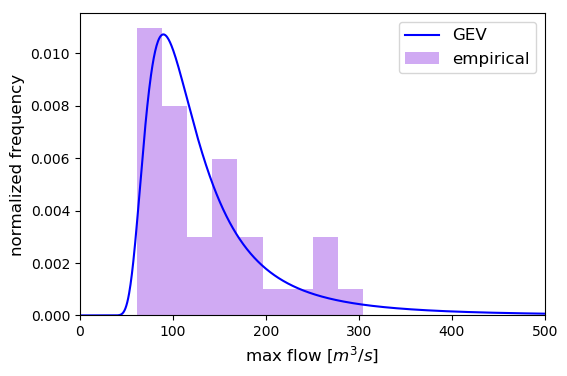

In [96]:
shape,loc,scale = gev.fit(data)

min_extreme,max_extreme = gev.interval(0.99,shape,loc,scale) 

# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)

# plot distribution
est = gev.pdf(x, shape,loc,scale)
plt.plot(x, est,color = 'blue',label='GEV')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

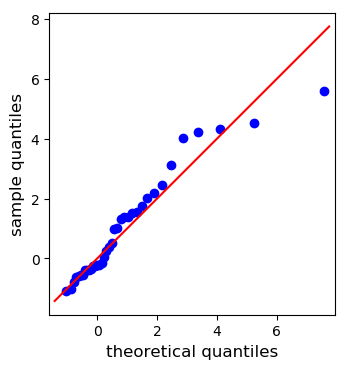

In [97]:
sm.qqplot(data, line='45',fit=True,dist = gev)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

In [23]:
print('p of X>230: ',1-gev.cdf(230, shape,loc,scale))
print('p of X>310: ',1-gev.cdf(310, shape,loc,scale))
print('p of X<50: ',gev.cdf(50, shape,loc,scale))
print('p of X<70: ',gev.cdf(70, shape,loc,scale))
print('p of X>305: ',1-gev.cdf(305, shape,loc,scale))
print('p of X>280: ',1-gev.cdf(280, shape,loc,scale))

p of X>230:  0.0980553984258
p of X>310:  0.0445610702153
p of X<50:  0.000932828535019
p of X<70:  0.0650484100215
p of X>305:  0.0465401498727
p of X>280:  0.0584459473191


In [24]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-gev.cdf(flow, shape,loc,scale)
        flow+=0.5  
    print("GEV: prob of flow > ", flow-0.5, "...", probability)

GEV: prob of flow >  228.5 ... 0.0997374662457
GEV: prob of flow >  539.5 ... 0.00997760978401
GEV: prob of flow >  1256.0 ... 0.000999150610838


## Markdown

In [106]:
P230 = np.array([0.0981, 0.0644, 0.1106, 0.0975, 0.0965, 0.0995, 0.1080, 0.0951])
P280 = np.array([0.0584, 0.0216, 0.0516, 0.0578, 0.0487, 0.0479, 0.0559, 0.0493])
P280/P230


array([ 0.59531091,  0.33540373,  0.46654611,  0.59282051,  0.50466321,
        0.48140704,  0.51759259,  0.51840168])

## Gumbel

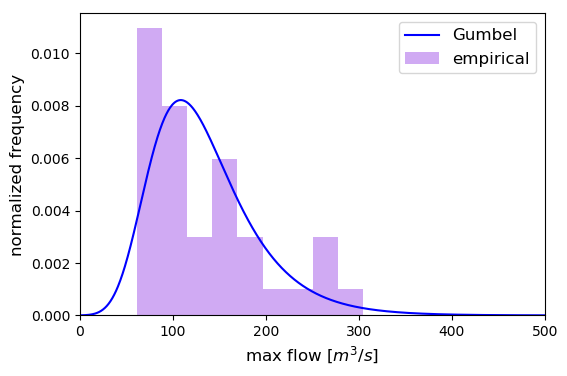

In [9]:
loc, scale = gum.fit(data)

# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)

# plot distribution
est = gum.pdf(x, loc,scale)
plt.plot(x, est,color = 'blue',label='Gumbel')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

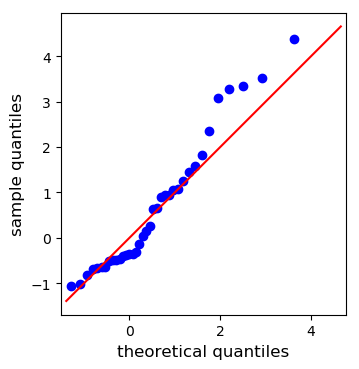

In [11]:
sm.qqplot(data, line='45',fit=True, dist = gum) #, scale = scale, loc = loc
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

In [147]:
print('p of X>230: ',1-gum.cdf(230, loc,scale))
print('p of X>310: ',1-gum.cdf(310, loc,scale))
print('p of X<50: ',gum.cdf(50, loc,scale))
print('p of X<70: ',gum.cdf(70, loc,scale))
print('p of X>305: ',1-gum.cdf(305, loc,scale))
print('p of X>280: ',1-gum.cdf(280, loc,scale))

p of X>230:  0.0643646844302
p of X>310:  0.0110959628105
p of X<50:  0.0248233358996
p of X<70:  0.0939286961169
p of X>305:  0.0123977763328
p of X>280:  0.0215599176775


In [26]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-gum.cdf(flow,loc,scale)
        flow+=0.5  
    print("Gumbel: prob of flow > ", flow-0.5, "...", probability)

Gumbel: prob of flow >  209.5 ... 0.0997905857894
Gumbel: prob of flow >  315.0 ... 0.00993015657951
Gumbel: prob of flow >  418.5 ... 0.000990137596126


## Pareto

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_continuous_distns.py:2062: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


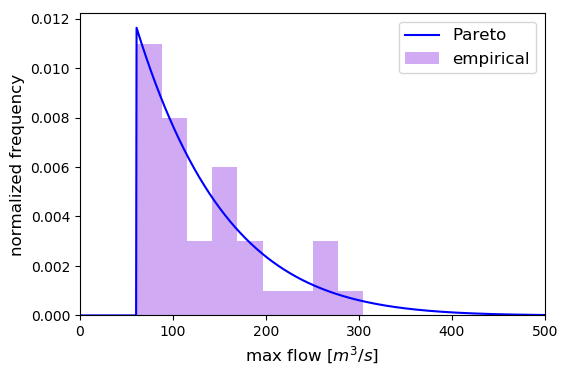

In [83]:
shape, loc, scale = par.fit(data)

# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)

# plot distribution
est = par.pdf(x, shape, loc, scale)


plt.plot(x, est,color = 'blue',label='Pareto')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

In [86]:
print('p of X>230: ',1-par.cdf(230,shape, loc, scale))
print('p of X>310: ',1-par.cdf(310,shape, loc, scale))
print('p of X<50: ',par.cdf(50,shape, loc, scale))
print('p of X<70: ',par.cdf(70,shape, loc, scale))
print('p of X>305: ',1-par.cdf(305,shape, loc, scale))
print('p of X>280: ',1-par.cdf(280,shape, loc, scale))

p of X>230:  0.110632543064
p of X>310:  0.0316969189344
p of X<50:  0.0
p of X<70:  0.0999537204546
p of X>305:  0.0344433156703
p of X>280:  0.051640213145


In [88]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-par.cdf(flow,shape, loc, scale)
        flow+=0.5  
    print("Pareto: prob of flow > ", flow-0.5, "...", probability)

Pareto: prob of flow >  237.0 ... 0.0997961322766
Pareto: prob of flow >  375.5 ... 0.00992703810299
Pareto: prob of flow >  484.0 ... 0.000995026809684


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_continuous_distns.py:2062: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


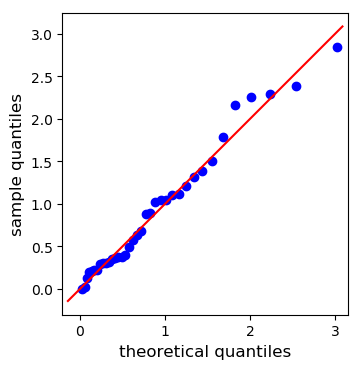

In [89]:
sm.qqplot(data, line='45',fit=True, dist = par) #, scale = scale, loc = loc, a = shape
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

In [236]:
shape, scale, loc

(85.933861579635931, 60.999999999894712, -0.10451005866156973)

## Frechet

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


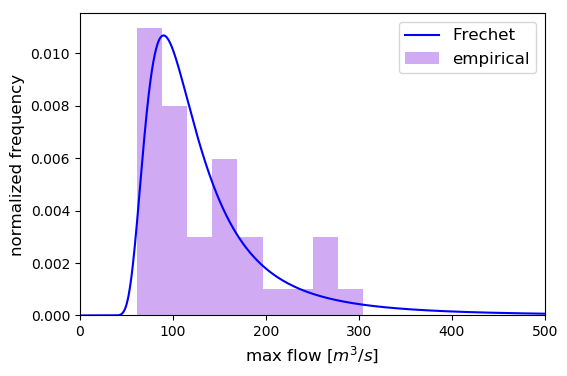

In [90]:
shape,loc,scale = fre.fit(data)

# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)

# plot distribution
est = fre.pdf(x, shape, loc, scale)
plt.plot(x, est,color = 'blue',label='Frechet')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

In [93]:
print('p of X>230: ',1-fre.cdf(230, shape, loc, scale))
print('p of X>310: ',1-fre.cdf(310, shape, loc, scale))
print('p of X<50: ',fre.cdf(50, shape, loc, scale))
print('p of X<70: ',fre.cdf(70, shape, loc, scale))
print('p of X>305: ',1-fre.cdf(305, shape, loc, scale))
print('p of X>280: ',1-fre.cdf(280, shape, loc, scale))

p of X>230:  0.0974525233212
p of X>310:  0.0439657882217
p of X<50:  0.0010202291185
p of X<70:  0.0653120689811
p of X>305:  0.0459384232849
p of X>280:  0.0578186414045


In [94]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-fre.cdf(flow, shape, loc, scale)
        flow+=0.5  
    print("Frechet: prob of flow > ", flow-0.5, "...", probability)

Frechet: prob of flow >  228.0 ... 0.0997086534929
Frechet: prob of flow >  533.5 ... 0.00998336825583
Frechet: prob of flow >  1229.0 ... 0.000999142783717


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


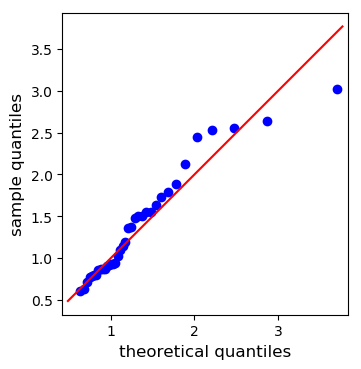

In [95]:
sm.qqplot(data, line='45',fit=True, dist = fre)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

## Birnbaum

In [17]:
from scipy.stats import fatiguelife as bir

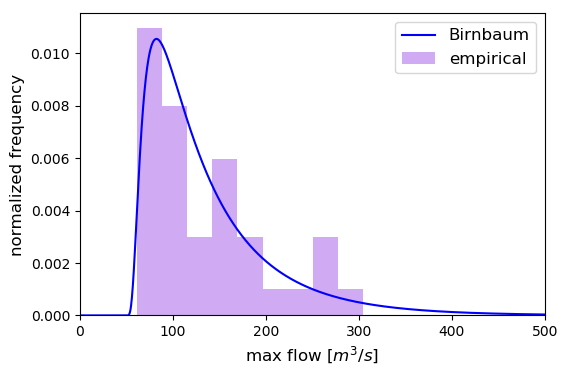

In [73]:
shape,loc,scale = bir.fit(data)

# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)

# plot distribution
est = bir.pdf(x, shape, loc, scale)
plt.plot(x, est,color = 'blue',label='Birnbaum')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

In [75]:
print('p of X>230: ',1-bir.cdf(230,shape, loc, scale))
print('p of X>310: ',1-bir.cdf(310,shape, loc, scale))
print('p of X<50: ',bir.cdf(50,shape, loc, scale))
print('p of X<70: ',bir.cdf(70,shape, loc, scale))
print('p of X>305: ',1-bir.cdf(305,shape, loc, scale))
print('p of X>280: ',1-bir.cdf(280,shape, loc, scale))

p of X>230:  0.0964842250018
p of X>310:  0.032514666196
p of X<50:  6.02194837351e-11
p of X<70:  0.0690858959732
p of X>305:  0.0347656101197
p of X>280:  0.0486760842349


In [76]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-bir.cdf(flow,shape, loc, scale)
        flow+=0.5  
    print("Frechet: prob of flow > ", flow-0.5, "...", probability)

Frechet: prob of flow >  227.5 ... 0.0998875785935
Frechet: prob of flow >  399.5 ... 0.00997912099143
Frechet: prob of flow >  579.0 ... 0.00099569080942


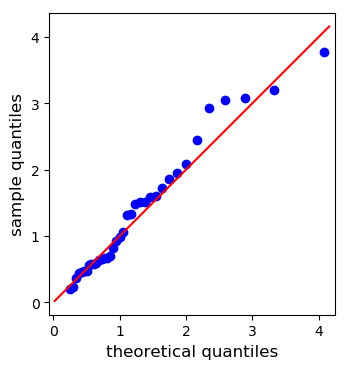

In [77]:
sm.qqplot(data, line='45',fit=True, dist = bir)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

## Gamma

In [25]:
from scipy.stats import gamma as gam

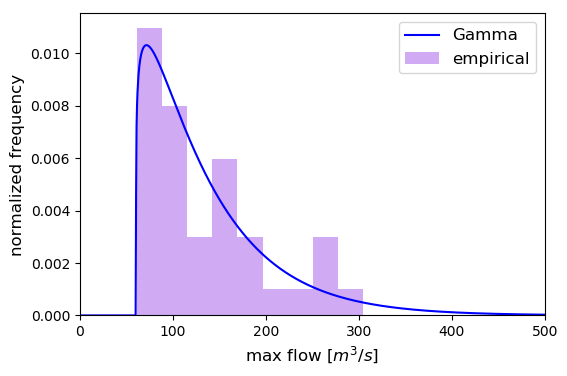

In [78]:
shape,loc,scale = gam.fit(data)

# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)

# plot distribution
est = gam.pdf(x, shape, loc, scale)
plt.plot(x, est,color = 'blue',label='Gamma')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

In [79]:
print('p of X>230: ',1-gam.cdf(230,shape, loc, scale))
print('p of X>310: ',1-gam.cdf(310,shape, loc, scale))
print('p of X<50: ',gam.cdf(50,shape, loc, scale))
print('p of X<70: ',gam.cdf(70,shape, loc, scale))
print('p of X>305: ',1-gam.cdf(305,shape, loc, scale))
print('p of X>280: ',1-gam.cdf(280,shape, loc, scale))

p of X>230:  0.099545354583
p of X>310:  0.0307531263096
p of X<50:  0.0
p of X<70:  0.0890505782613
p of X>305:  0.0331102801332
p of X>280:  0.0478628568263


In [29]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-gam.cdf(flow,shape, loc, scale)
        flow+=0.5  
    print("Frechet: prob of flow > ", flow-0.5, "...", probability)

Frechet: prob of flow >  230.0 ... 0.099545354583
Frechet: prob of flow >  386.0 ... 0.00995863736017
Frechet: prob of flow >  540.0 ... 0.000994508030718


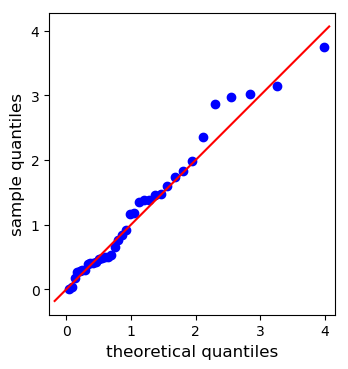

In [31]:
sm.qqplot(data, line='45',fit=True, dist = gam)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

## Expon

In [34]:
from scipy.stats import expon as exp

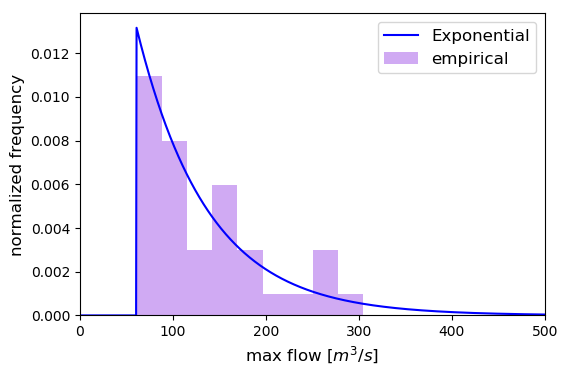

In [41]:
# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)
shape,loc = exp.fit(data)

# plot distribution
est = exp.pdf(x,  shape, loc)
plt.plot(x, est,color = 'blue',label='Exponential')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

In [42]:
print('p of X>230: ',1-exp.cdf(230,shape, loc))
print('p of X>310: ',1-exp.cdf(310,shape, loc))
print('p of X<50: ',exp.cdf(50,shape, loc))
print('p of X<70: ',exp.cdf(70,shape, loc))
print('p of X>305: ',1-exp.cdf(305,shape, loc))
print('p of X>280: ',1-exp.cdf(280,shape, loc))

p of X>230:  0.107953217117
p of X>310:  0.0376353216041
p of X<50:  0.0
p of X<70:  0.111790314257
p of X>305:  0.040197415312
p of X>280:  0.0558741096447


In [43]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-exp.cdf(flow,shape, loc)
        flow+=0.5  
    print("Frechet: prob of flow > ", flow-0.5, "...", probability)

Frechet: prob of flow >  236.0 ... 0.0997499283612
Frechet: prob of flow >  411.0 ... 0.00995004820807
Frechet: prob of flow >  585.5 ... 0.000999074851414


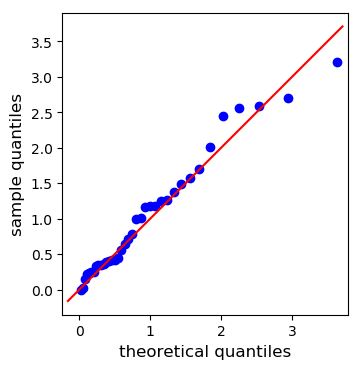

In [36]:
sm.qqplot(data, line='45',fit=True, dist = exp)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

## Inverse Gauss

In [57]:
from scipy.stats import invgauss as igs

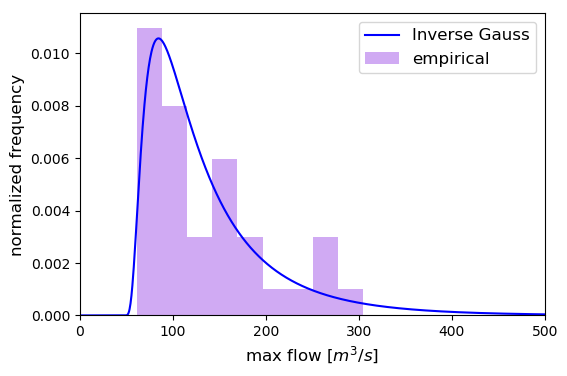

In [59]:
# evenly spread x axis values for pdf plot
x = np.linspace(0,500,1000)
shape,loc, scale = igs.fit(data)

# plot distribution
est = igs.pdf(x,shape,loc, scale )
plt.plot(x, est,color = 'blue',label='Inverse Gauss')
hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

In [61]:
print('p of X>230: ',1-igs.cdf(230,shape, loc, scale))
print('p of X>310: ',1-igs.cdf(310,shape, loc, scale))
print('p of X<50: ',igs.cdf(50,shape, loc, scale))
print('p of X<70: ',igs.cdf(70,shape, loc, scale))
print('p of X>305: ',1-igs.cdf(305,shape, loc, scale))
print('p of X>280: ',1-igs.cdf(280,shape, loc, scale))

p of X>230:  0.0951499208156
p of X>310:  0.0337603549877
p of X<50:  1.23598944075e-06
p of X<70:  0.0666031696706
p of X>305:  0.0359410596413
p of X>280:  0.0493428549703


In [63]:
h = [0.1, 0.01, 0.001]

for i in h:
    flow = 200
    probability=1
    while probability > i:  #hladina vyznamnosti  
        probability = 1-igs.cdf(flow,shape, loc, scale)
        flow+=0.5  
    print("Frechet: prob of flow > ", flow-0.5, "...", probability)

Frechet: prob of flow >  226.5 ... 0.0997567648069
Frechet: prob of flow >  411.0 ... 0.00998000247869
Frechet: prob of flow >  616.5 ... 0.000998843070526


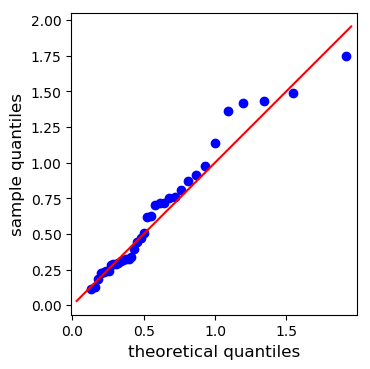

In [65]:
sm.qqplot(data, line='45',fit=True, dist = igs)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

## Comparison

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_continuous_distns.py:2062: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


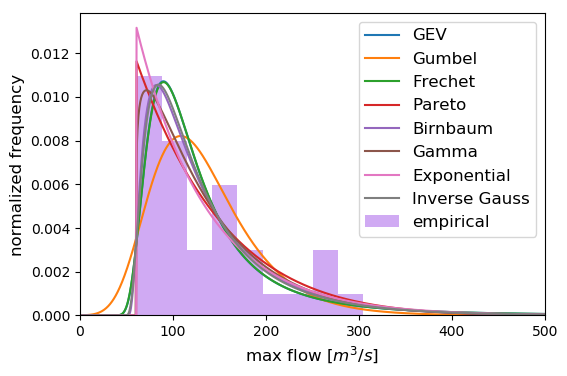

In [69]:

x = np.linspace(0,500,1000)
# evenly spread x axis values for pdf plot
loc,scale, shape = par.fit(data)
estpar = par.pdf(x, loc,scale, shape)

loc, scale = gum.fit(data)
estgum = gum.pdf(x, loc,scale)

loc,scale, shape = fre.fit(data)
estfre = fre.pdf(x, loc,scale, shape)

shape,loc,scale = gev.fit(data)
estgev = gev.pdf(x, shape,loc,scale)

shape,loc,scale = bir.fit(data)
estbir = bir.pdf(x, shape,loc,scale)

shape,loc,scale = gam.fit(data)
estgam = gam.pdf(x, shape,loc,scale)

shape,loc = exp.fit(data)
estexp = exp.pdf(x, shape,loc)

shape,loc,scale = igs.fit(data)
estigs = igs.pdf(x, shape,loc,scale)


# plot distribution

plt.plot(x, estgev,label='GEV')
plt.plot(x, estgum,label='Gumbel')
plt.plot(x, estfre,label='Frechet')
plt.plot(x, estpar,label='Pareto')
plt.plot(x, estbir,label='Birnbaum')
plt.plot(x, estgam,label='Gamma')
plt.plot(x, estexp,label='Exponential')
plt.plot(x, estigs,label='Inverse Gauss')

hist = plt.hist(data,'doane',normed=True,alpha=0.4, color = 'blueviolet',label='empirical')
data_pdf = hist[0]
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.legend(fontsize=12)
plt.show()

# Kernel Density Estimate


In [108]:
# Gaussian KDE
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut


In [324]:
from scipy.stats import scoreatpercentile as sap
def _select_sigma(X):
    """
    Returns the smaller of std(X, ddof=1) or normalized IQR(X) over axis 0.
    References
    ----------
    Silverman (1986) p.47
    """
#    normalize = norm.ppf(.75) - norm.ppf(.25)
    normalize = 1.349
#    IQR = np.subtract.reduce(percentile(X, [75,25],
#                             axis=axis), axis=axis)/normalize
    IQR = (sap(X, 75) - sap(X, 25))/normalize
    return np.minimum(np.std(X, axis=0, ddof=1), IQR)

def bw_silverman(x, kernel=None):

    A = _select_sigma(x)
    n = len(x)
    return .9 * A * n ** (-0.2)

b = bw_silverman(data)

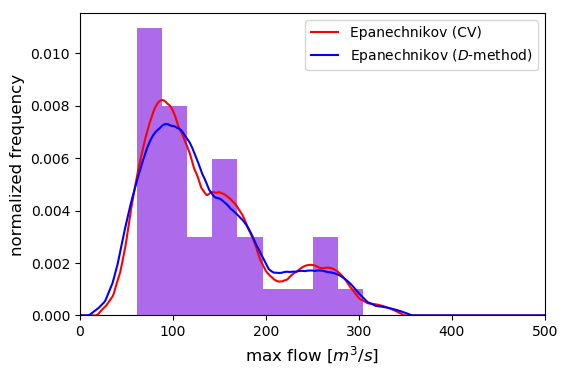

In [152]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]

  
kde = KernelDensity(kernel = 'epanechnikov', bandwidth = 43.5).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="Epanechnikov (CV)".format(i),color = 'red')
kde = KernelDensity(kernel = 'epanechnikov', bandwidth = np.sqrt(5)*23.28).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="Epanechnikov ($D$-method)".format(i),color = 'blue')
plt.hist(X,normed=True, bins ='doane',alpha=0.7, color = 'blueviolet')
plt.legend(loc='upper right')
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.show()

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


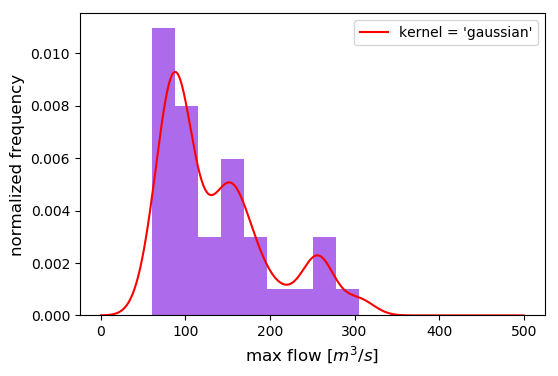

best bandwidth: 18.0
best score: -40.37890219352555


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


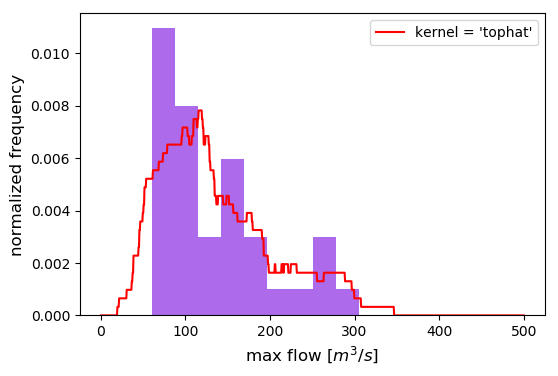

best bandwidth: 41.5
best score: -40.83314342547322


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


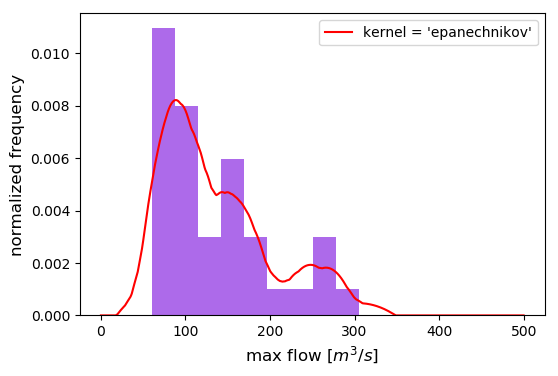

best bandwidth: 43.5
best score: -40.566743508341965


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


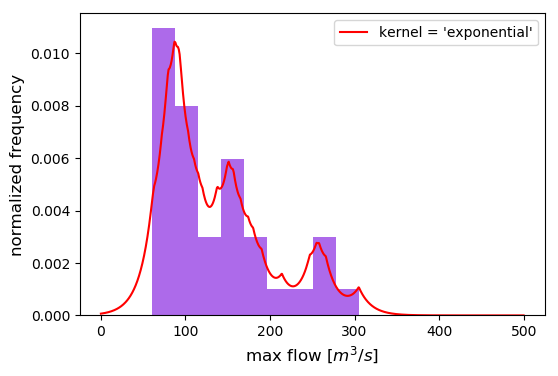

best bandwidth: 14.5
best score: -40.29042468300676


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


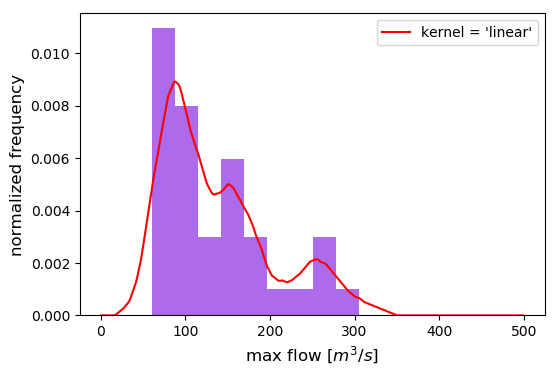

best bandwidth: 45.5
best score: -40.45265875101705


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


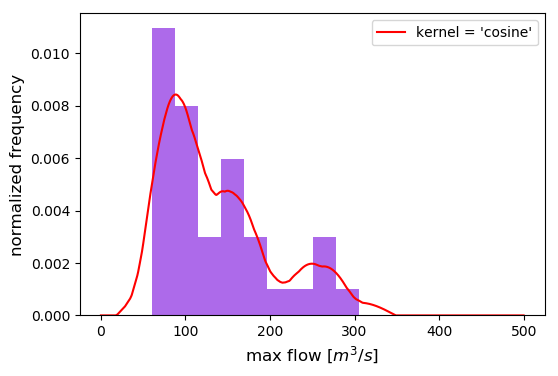

best bandwidth: 43.5
best score: -40.538889627572054


In [125]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]
#LeaveOneOut(len(X))


kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
params = {'bandwidth': np.linspace(0, 50, 101)}    

for i in kernel:    
    grid = GridSearchCV(KernelDensity(kernel = i), params, cv=5)
    grid.fit(X)
    kde = grid.best_estimator_
    log_dens = kde.score_samples(X_plot)
    plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(i),color = 'red')
    plt.hist(X,normed=True, bins ='doane',alpha=0.7, color = 'blueviolet')
    plt.legend(loc='upper right')
    plt.ylabel("normalized frequency",fontsize=12)
    plt.xlabel("max flow $[m^3/s]$",fontsize=12)
    plt.show()
    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
    print("best score: {0}".format(grid.best_score_))





In [153]:
p230 = np.array([0.1308, 0.1241, 0.1291, 0.1329, 0.1293, 0.1296])
p280 = np.array([0.0376, 0.0451, 0.0397, 0.0382, 0.0390, 0.0391])

p280/p230

array([ 0.28746177,  0.3634166 ,  0.30751356,  0.28743416,  0.30162413,
        0.30169753])

## Comparison

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The defa

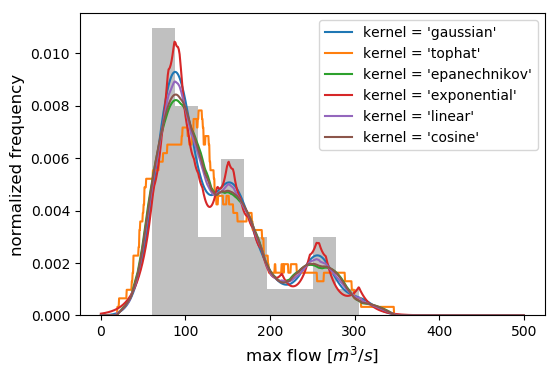

best bandwidth: 43.5
best kernel: cosine
best score: -40.538889627572054


In [128]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]



kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
params = {'bandwidth': np.linspace(0, 50, 101)}    

for i in kernel:    
    grid = GridSearchCV(KernelDensity(kernel = i), params, cv=5)
    grid.fit(X)
    kde = grid.best_estimator_
    log_dens = kde.score_samples(X_plot)
    plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(i))
    plt.hist(X,normed=True, bins ='doane',alpha=0.1, color = 'gray')
    
plt.legend(loc='upper right')
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.show()
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
print("best kernel: {0}".format(grid.best_estimator_.kernel))
print("best score: {0}".format(grid.best_score_))

## Probabilities and p-values

In [129]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]
import warnings
warnings.filterwarnings('ignore')
kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
params = {'bandwidth': np.linspace(0, 50, 101)}
prob = [230, 310, 50, 70, 305, 280]


for i in kernel:      
    for pr in prob:    
        grid = GridSearchCV(KernelDensity(kernel = i), params, cv=5)
        grid.fit(X)
        kde = grid.best_estimator_
        start = 0  # Start of the range
        end = pr    # End of the range
        N = 1000    # Number of evaluation points 
        step = (end - start) / (N - 1)  # Step size
        x = np.linspace(start, end, N)[:, np.newaxis]  # Generate values in the range
        kd_vals = np.exp(kde.score_samples(x))  # Get PDF values for each x
        probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
        if pr < 71:
            print(i," ker: prob of flow < ", pr, "...", probability)
        else:
            print(i," ker: prob of flow > ", pr, "...", 1-probability)



gaussian  ker: prob of flow >  230 ... 0.131388173025
gaussian  ker: prob of flow >  310 ... 0.0107617299271
gaussian  ker: prob of flow <  50 ... 0.0257722897999
gaussian  ker: prob of flow <  70 ... 0.115803847262
gaussian  ker: prob of flow >  305 ... 0.0140467611449
gaussian  ker: prob of flow >  280 ... 0.0366642798729
tophat  ker: prob of flow >  230 ... 0.124135532472
tophat  ker: prob of flow >  310 ... 0.0113721666962
tophat  ker: prob of flow <  50 ... 0.0475891065276
tophat  ker: prob of flow <  70 ... 0.152940305985
tophat  ker: prob of flow >  305 ... 0.0149902426034
tophat  ker: prob of flow >  280 ... 0.0450756846068
epanechnikov  ker: prob of flow >  230 ... 0.129494830669
epanechnikov  ker: prob of flow >  310 ... 0.0111220591367
epanechnikov  ker: prob of flow <  50 ... 0.0299441563674
epanechnikov  ker: prob of flow <  70 ... 0.128852019938
epanechnikov  ker: prob of flow >  305 ... 0.0136370083323
epanechnikov  ker: prob of flow >  280 ... 0.0392421267989
exponentia

In [135]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]
import warnings
warnings.filterwarnings('ignore')
kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
params = {'bandwidth': np.linspace(0, 50, 101)}
prob = np.linspace(200, 400, 400-200+1)
probability=0
opt = [19, 41.5, 44.5, 40, 48.5, 44.5] 
h=0.001 #hladina vyznamnosti

for i in kernel:
    pr = 200
    probability=0
    j=0
    while (1-probability) > h:  #hladina vyznamnosti  
        kde = KernelDensity(kernel = i, bandwidth = opt[j]).fit(X)
        start = 0  # Start of the range
        end = pr    # End of the range
        N = 1000    # Number of evaluation points 
        step = (end - start) / (N - 1)  # Step size
        x = np.linspace(start, end, N)[:, np.newaxis]  # Generate values in the range
        kd_vals = np.exp(kde.score_samples(x))  # Get PDF values for each x
        probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
        pr+=0.5  
    j+=1 
    print(i," ker: prob of flow > ", pr-0.5, "...", 1-probability)


gaussian  ker: prob of flow >  339.5 ... 0.000954414189175
tophat  ker: prob of flow >  323.0 ... 0.00036523009496
epanechnikov  ker: prob of flow >  319.5 ... 0.000963961758481
exponential  ker: prob of flow >  7145.5 ... 0.000983305114729
linear  ker: prob of flow >  319.0 ... 0.000882848665647
cosine  ker: prob of flow >  319.5 ... 0.000849720802147


In [347]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]
import warnings
warnings.filterwarnings('ignore')
kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
params = {'bandwidth': np.linspace(0, 50, 101)}
prob = np.linspace(200, 400, 400-200+1)
probability=0
opt = [25, 25, 25, 25, 25, 25] 
h=0.001 #hladina vyznamnosti

for i in kernel:
    pr = 200
    probability=0
    j=0
    while (1-probability) > h:  #hladina vyznamnosti  
        kde = KernelDensity(kernel = i, bandwidth = opt[j]).fit(X)
        start = 0  # Start of the range
        end = pr    # End of the range
        N = 1000    # Number of evaluation points 
        step = (end - start) / (N - 1)  # Step size
        x = np.linspace(start, end, N)[:, np.newaxis]  # Generate values in the range
        kd_vals = np.exp(kde.score_samples(x))  # Get PDF values for each x
        probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
        pr+=0.5  
    j+=1 
    print(i," ker: prob of flow > ", pr-0.5, "...", 1-probability)


gaussian  ker: prob of flow >  358.0 ... 0.000980279670112
tophat  ker: prob of flow >  328.0 ... 0.000994508021535
epanechnikov  ker: prob of flow >  324.5 ... 0.000861931743428
exponential  ker: prob of flow >  21680.0 ... 0.000998230177013
linear  ker: prob of flow >  323.5 ... 0.000868130549725
cosine  ker: prob of flow >  324.0 ... 0.000896337522991


## Other plots

best bandwidth: 19.0
best score: -5.455622447714657


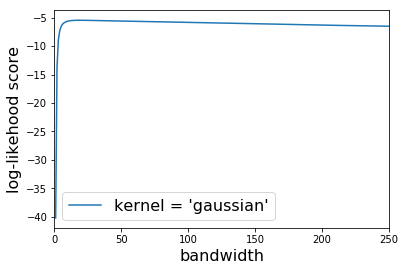

best bandwidth: 42.0
best score: -5.519317426261741


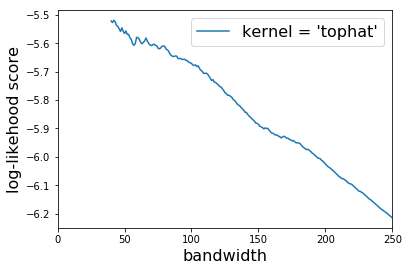

best bandwidth: 44.0
best score: -5.4795097093367


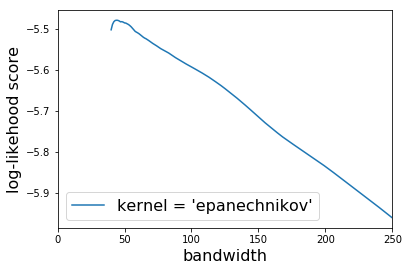

best bandwidth: 15.0
best score: -5.450137442617105


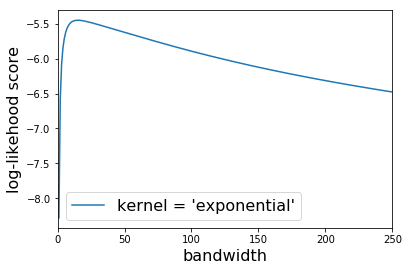

best bandwidth: 51.0
best score: -5.467303214007821


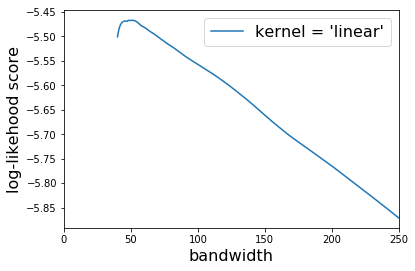

best bandwidth: 45.0
best score: -5.476824465489528


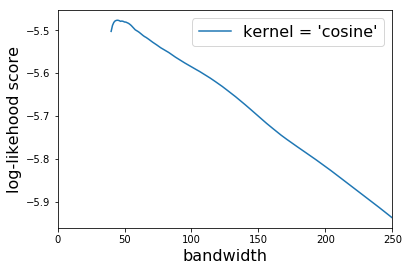

In [37]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]



kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
params = {'bandwidth': np.linspace(0, 250, 251)}    

for i in kernel:    
    grid = GridSearchCV(KernelDensity(kernel = i), params, cv=LeaveOneOut(len(X)))
    grid.fit(X)
    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
    print("best score: {0}".format(grid.best_score_))
    scores = [val.mean_validation_score for val in grid.grid_scores_]
    plt.plot(scores,label="kernel = '{0}'".format(i))
    plt.ylabel("log-likehood score",fontsize=16)
    plt.xlabel("bandwidth",fontsize=16)
    plt.xlim((0,250))
    plt.legend(loc='best',fontsize=16)
    plt.show()



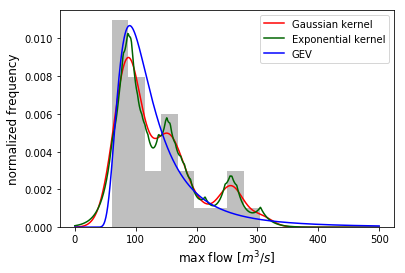

In [38]:
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]

kde1 = KernelDensity(kernel = 'gaussian', bandwidth = 19).fit(X)
kde2 = KernelDensity(kernel = 'exponential', bandwidth= 15).fit(X)

log_dens1 = kde1.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens1), '-',
                label="Gaussian kernel",color = 'red')
log_dens2 = kde2.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens2), '-',
                label="Exponential kernel",color = 'darkgreen')


plt.hist(X,normed=True, bins ='doane',alpha=0.5, color = 'gray')
plt.plot(np.linspace(0, 500, 1000),est,label='GEV',color = 'blue')
plt.legend()
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.show()

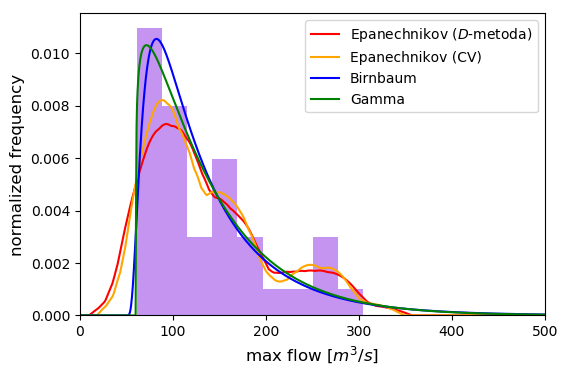

In [151]:
X = data[:, np.newaxis]
X_plot = np.linspace(0, 500, 1000)[:, np.newaxis]

  

kde = KernelDensity(kernel = 'epanechnikov', bandwidth = np.sqrt(5)*23.28).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="Epanechnikov ($D$-metoda)".format(i),color = 'red')
kde = KernelDensity(kernel = 'epanechnikov', bandwidth =43.5).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="Epanechnikov (CV)".format(i),color = 'orange')

plt.plot(np.linspace(0, 500, 1000),estbir,label='Birnbaum',color = 'blue')
plt.plot(np.linspace(0, 500, 1000),estgam,label='Gamma',color = 'green')

plt.hist(X,normed=True, bins ='doane',alpha=0.5, color = 'blueviolet')


plt.legend(loc='upper right')
plt.ylabel("normalized frequency",fontsize=12)
plt.xlabel("max flow $[m^3/s]$",fontsize=12)
plt.xlim([0,500])
plt.show()

# Further data Analysis

In [179]:
from scipy.stats import genextreme as gev
from scipy.stats import genpareto as par
from scipy.stats import gumbel_r as gum
from scipy.stats import invweibull as fre
from scipy.stats import weibull_max as wei


### QQ Plots

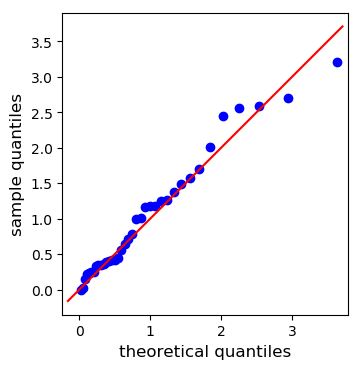

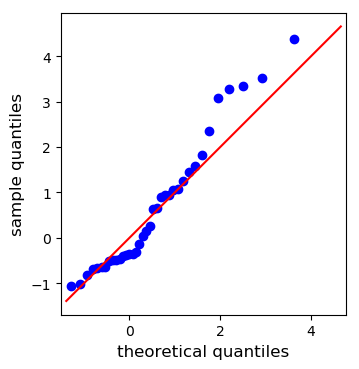

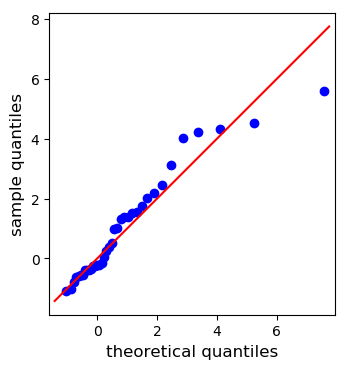

In [44]:
import statsmodels.api as sm


sm.qqplot(data, line='45',fit=True,dist = stats.expon, scale =1, loc = 0)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()
sm.qqplot(data, line='45',fit=True,dist = stats.gumbel_r)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()
sm.qqplot(data, line='45',fit=True,dist = stats.genextreme)
plt.ylabel("sample quantiles",fontsize=12)
plt.xlabel("theoretical quantiles",fontsize=12)
plt.axis('scaled')
plt.show()

### PP Plots

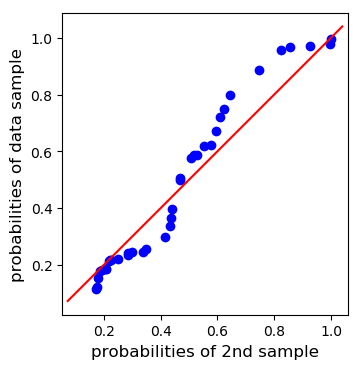

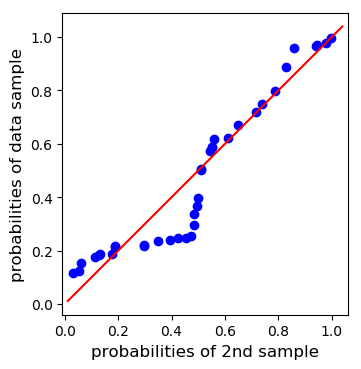

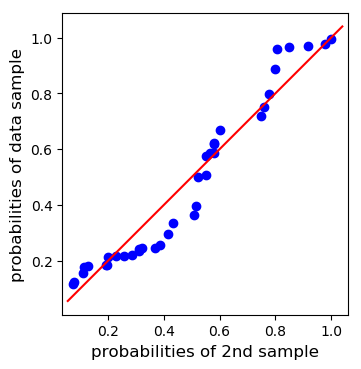

In [35]:
import scipy

y = np.random.exponential(scale=1, size = 37)
y2 = np.random.gumbel(loc=0, scale=1, size = 37)
y3 = scipy.stats.genextreme.rvs(c=0, size = 37)

pp_x = sm.ProbPlot(data, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
pp_y2 = sm.ProbPlot(y2, fit=True)
pp_y3 = sm.ProbPlot(y3, fit=True)
fig = pp_x.ppplot(line='45', other=pp_y)
plt.ylabel("probabilities of data sample",fontsize=12)
plt.xlabel("probabilities of 2nd sample",fontsize=12)
plt.axis('scaled')
plt.show()
fig = pp_x.ppplot(line='45', other=pp_y2)
plt.ylabel("probabilities of data sample",fontsize=12)
plt.xlabel("probabilities of 2nd sample",fontsize=12)
plt.axis('scaled')
plt.show()
fig = pp_x.ppplot(line='45', other=pp_y3)
plt.ylabel("probabilities of data sample",fontsize=12)
plt.xlabel("probabilities of 2nd sample",fontsize=12)
plt.axis('scaled')
plt.show()

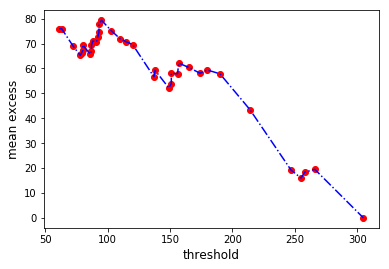

In [113]:
meex = mex.meanexcess_plot(data)
plt.scatter(meex[0],meex[1],color='red')
plt.plot(meex[0],meex[1],'-.',color='blue')
plt.ylabel("mean excess",fontsize=12)
plt.xlabel("threshold",fontsize=12)
plt.show()